# 📁 Step 1: Problem Understanding
    You need to predict customer churn based on various customer-related features. The problem is binary: Churn = Yes (1) or No (0)

##  📁 Step 2: Data Collection
        First, let's download the dataset. If you’re using Kaggle, you can download the Telco Customer Churn dataset, or you can use a built-in dataset for simplicity.

    Example using seaborn built-in dataset:

In [45]:
import pandas as pd

# Load dataset (replace the path with the actual file path)
df = pd.read_csv('Telco Customer Churn.csv')

# Check the first few rows
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 📁 Step 3: Data Preprocessing

In [48]:
# 1. Handle Missing Values:
# Convert 'TotalCharges' to numeric, invalid parsing will be converted to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [50]:
# Fill missing values in 'TotalCharges' (if any)
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3148\3245569984.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


2. Convert Categorical Columns:
 
      The dataset contains several categorical variables, which need to be converted into numerical representations using One-Hot Encoding for machine learning.

In [53]:
# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# Check the updated dataframe
df.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
1,0,34,56.95,1889.50,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,0,2,53.85,108.15,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True
3,0,45,42.30,1840.75,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,True


3. Scaling Numerical Features:

    To ensure better performance of the model, we should scale the numerical features (tenure, MonthlyCharges, TotalCharges).

In [56]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Scale the relevant columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Check the scaled values
df[['tenure', 'MonthlyCharges', 'TotalCharges']].head()


,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193


 ## Step 4: Exploratory Data Analysis (EDA)
         Let's visualize the Churn distribution and correlations.

1. Visualizing Churn Distribution:

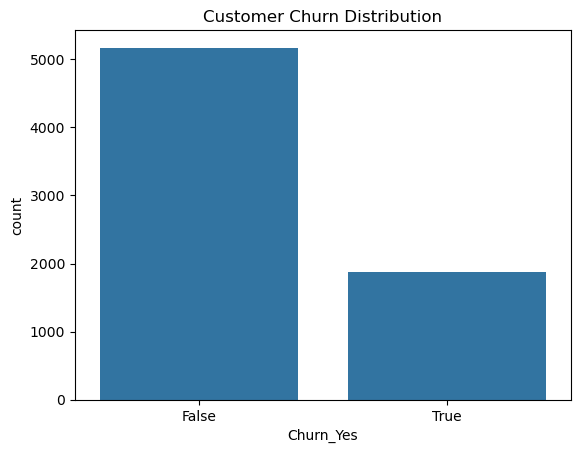

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of Churn
sns.countplot(x='Churn_Yes', data=df)  # After one-hot encoding, 'Churn' is now 'Churn_Yes'
plt.title('Customer Churn Distribution')
plt.show()


In [ ]:
# 2. Correlations:
# Correlation matrix
corr = df.corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## 📁 Step 5: Model Building
      1. Prepare Features and Target:
          The target variable is Churn_Yes, and we’ll use all the other columns as features.

In [19]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop([ 'Churn_Yes'], axis=1)  # Drop 'customerID' and target variable
y = df['Churn_Yes']  # Target is 'Churn_Yes' after one-hot encoding

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# 2. Train the Logistic Regression Model:
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


## 📁 Step 6: Model Evaluation

In [25]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.82


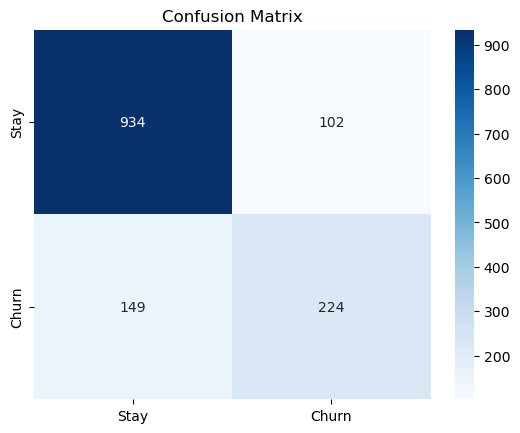

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Stay', 'Churn'], yticklabels=['Stay', 'Churn'])
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Precision: 0.69
Recall: 0.60
F1-Score: 0.64


AUC: 0.86


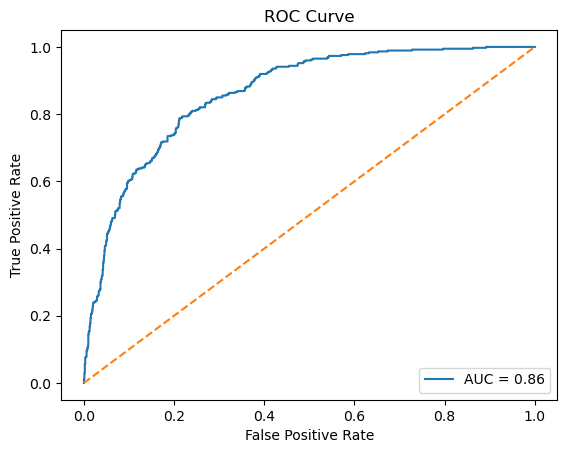

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Step 7: Model Interpretation
     You can interpret the coefficients of the model to understand how each feature influences the churn prediction:

In [35]:
# Get model coefficients
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.160844,-1.283545,-0.164224,0.561395,-0.319454,0.280573,0.242915,0.318988,-0.274646,-0.044876,...,-0.133779,0.223169,-0.133779,0.332902,-0.650916,-1.416014,0.338121,-0.081266,0.3374,-0.03258


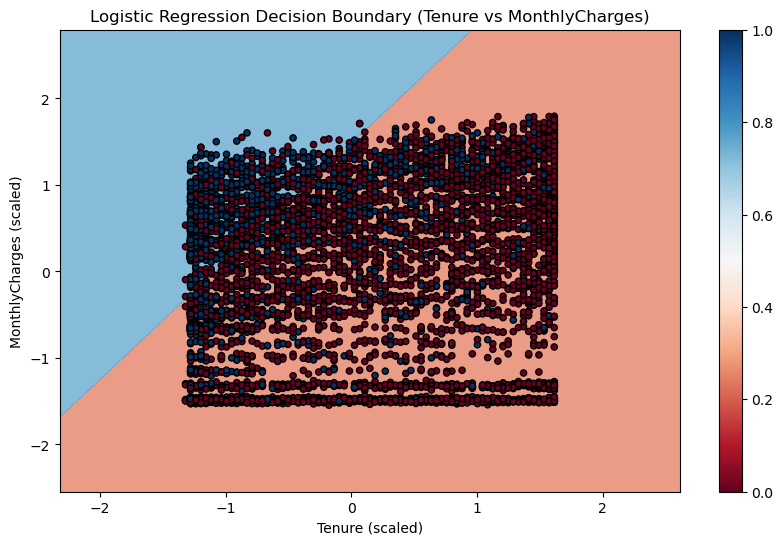

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Let's choose two features for simplicity: 'tenure' and 'MonthlyCharges'
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn_Yes']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create the logistic regression model and fit the data
model = LogisticRegression()
model.fit(X_train, y_train)

# Create a grid of points to plot the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, s=20)
plt.title('Logistic Regression Decision Boundary (Tenure vs MonthlyCharges)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('MonthlyCharges (scaled)')
plt.colorbar()
plt.show()


AUC: 0.83


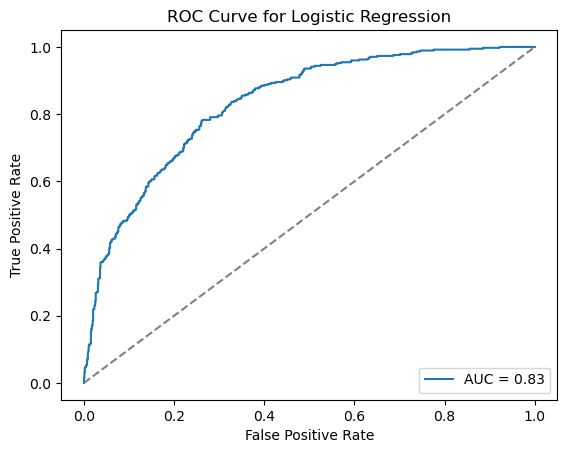

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_prob)
print(f'AUC: {auc:.2f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


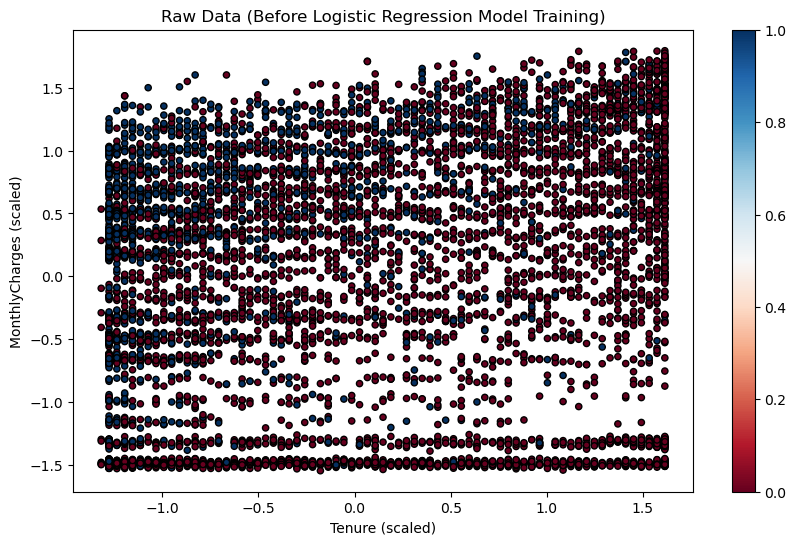

In [41]:
# Before training: visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, s=20)
plt.title('Raw Data (Before Logistic Regression Model Training)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('MonthlyCharges (scaled)')
plt.colorbar()
plt.show()


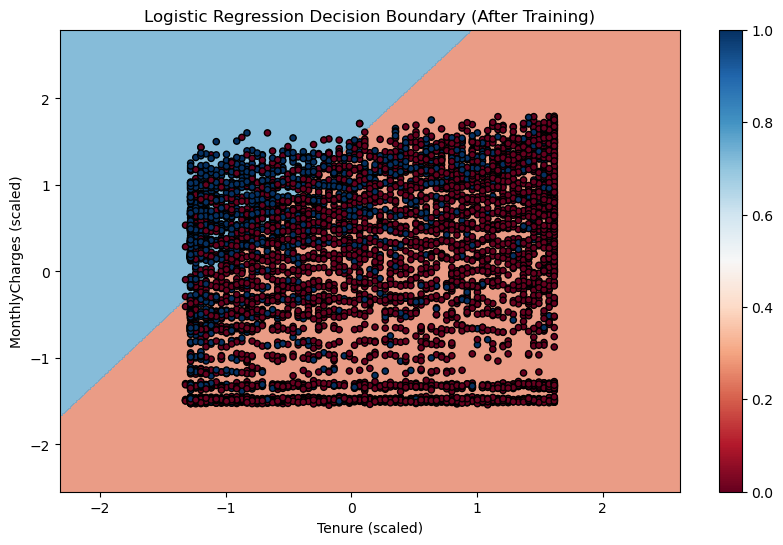

In [43]:

# After training: visualize the decision boundary
plt.figure(figsize=(10, 6))

# Create a grid of points to plot the decision boundary
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the class for each point on the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, s=20)
plt.title('Logistic Regression Decision Boundary (After Training)')
plt.xlabel('Tenure (scaled)')
plt.ylabel('MonthlyCharges (scaled)')
plt.colorbar()
plt.show()


